In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',100)

df=pd.read_csv('..\Data\cleaned_googleplaystore.csv')
# df=pd.read_csv('/content/drive/MyDrive/Develhope/Develhope_stage2/data-5---team-4/Stage_2/Data/cleaned_googleplaystore.csv')

## Task_1 - print(table) the unique names of all categories

In [2]:
pd.DataFrame(df['Category'].unique(), columns=['Category'])

,Category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


## Task_2 - plot a bar chart for categories with the total number of installing numbers in each category 

In [3]:
df_number_of_installs=(df.groupby(["Category"])["Installs"].sum()/1_000_000).sort_values(ascending=False)

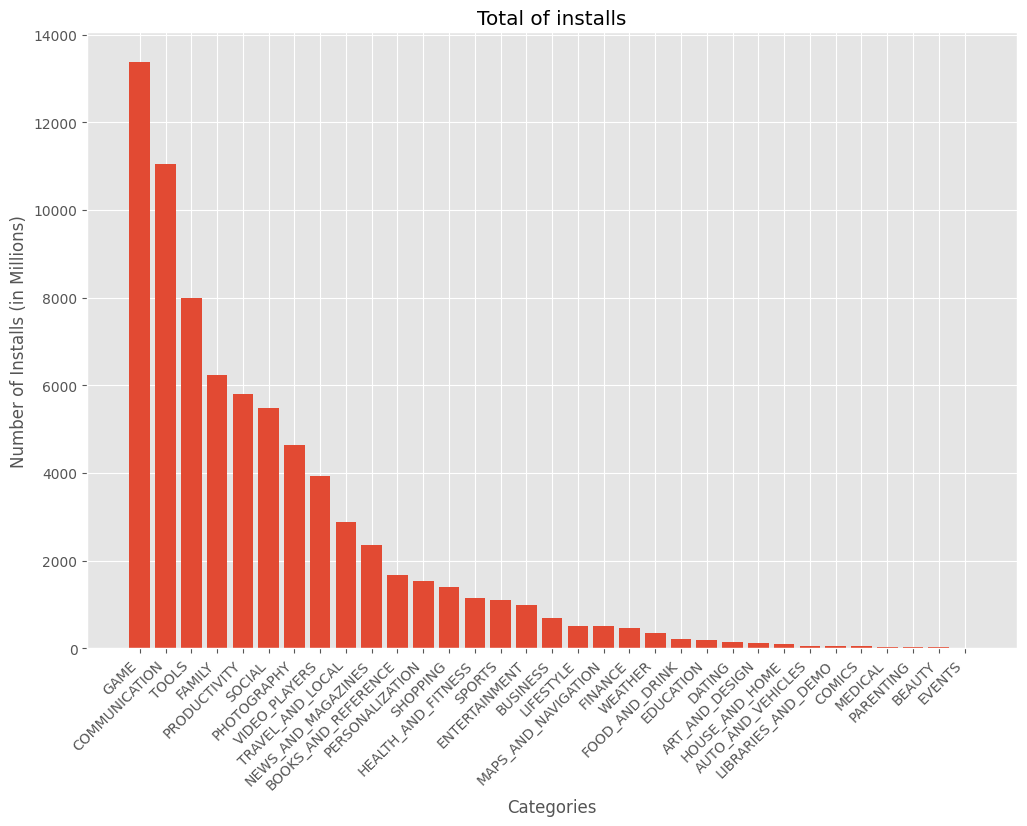

In [4]:
# create a bar chart to visualize the data
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df_number_of_installs.index, df_number_of_installs.values)
# to make the chart horizontal, use ax.barh instead of ax.bar above
ax.set_xlabel('Categories')
ax.set_title('Total of installs')
ax.set_ylabel('Number of Installs (in Millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Task_3 - plot a bar chart for the total prices of each paid app in each category (the summation of all prices in the same category)

In [5]:
# Checking the App Prices
df[['Category','App','Type','Price']].query('Type=="Paid"').sort_values('Category')

,Category,App,Type,Price
3473,ART_AND_DESIGN,"X Launcher Pro: PhoneX Theme, OS11 Control Center",Paid,1.99
3477,ART_AND_DESIGN,X Launcher Pro - IOS Style Theme & Control Center,Paid,1.99
3482,ART_AND_DESIGN,X Launcher Prime: With OS Style Theme & No Ads,Paid,1.99
3013,AUTO_AND_VEHICLES,Ulysse Speedometer Pro,Paid,1.99
5044,BOOKS_AND_REFERENCE,17th Edition Cable Sizer,Paid,3.08
...,...,...,...,...
3658,WEATHER,MyRadar NOAA Weather Radar Ad Free,Paid,2.99
6713,WEATHER,Weather Forecast Pro,Paid,3.99
3441,WEATHER,W Pro - Weather Forecast & Animated Weather Maps,Paid,1.99
8015,WEATHER,Florida Tides & Weather,Paid,6.99


In [7]:
df_catergory_prices=df[['App','Category','Type','Price']].query('Type=="Paid"') \
    .groupby(['Category'], sort=True)['Price'] \
    .agg('sum').sort_values(ascending=False)

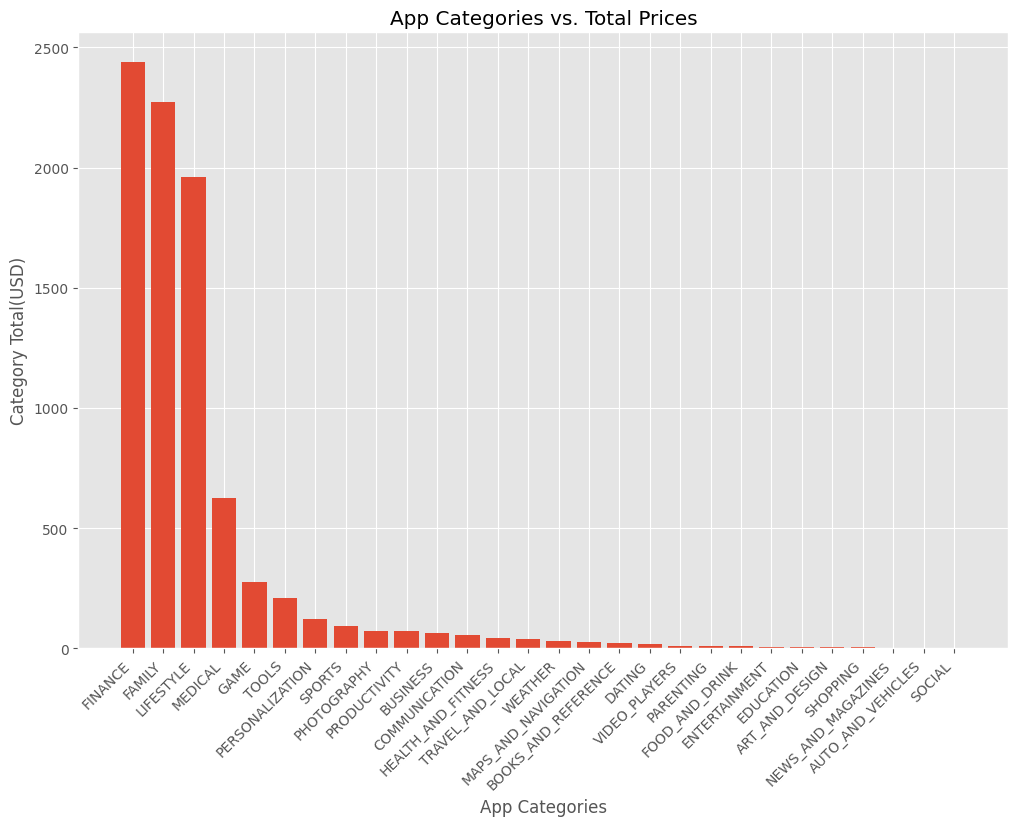

In [8]:
fig, ax_2 = plt.subplots(figsize=(12, 8))
ax_2.bar(df_catergory_prices.index, df_catergory_prices.values)
# to make the chart horizontal, use ax.barh instead of ax.bar above
ax_2.set_xlabel('App Categories')
ax_2.set_title('App Categories vs. Total Prices')
ax_2.set_ylabel('Category Total(USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Task_4 - plot a bar chart of the total profit of each category by multiplying the price by the number of installs

In [10]:
df = df.assign(Total_Profit = df.Installs * df.Price)
df.tail(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Total_Profit
8187,8187,Manga-FR - Anime Vostfr,COMICS,3.4,291,13.000000,10000,Free,0.0,Everyone,Comics,0.0
8188,8188,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.400000,10000,Free,0.0,Everyone,Books & Reference,0.0
8189,8189,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.300000,100000,Free,0.0,Everyone,News & Magazines,0.0
8190,8190,FR Tides,WEATHER,3.8,1195,0.568359,100000,Free,0.0,Everyone,Weather,0.0
8191,8191,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.604492,1000,Free,0.0,Everyone,Books & Reference,0.0
8192,8192,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,Education,0.0
8193,8193,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,0.0
8194,8194,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,Education,0.0
8195,8195,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,-99.990000,1000,Free,0.0,Mature 17+,Books & Reference,0.0
8196,8196,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.000000,10000000,Free,0.0,Everyone,Lifestyle,0.0


In [11]:
ordered_columns = ['App','Category','Rating','Size','Installs','Price','Total_Profit','Content Rating','Genres']
df = df[ordered_columns].sort_values('Total_Profit', ascending=False)
df.head(10)

,App,Category,Rating,Size,Installs,Price,Total_Profit,Content Rating,Genres
1531,Minecraft,FAMILY,4.5,-99.990000,10000000,6.99,69900000.0,Everyone 10+,Arcade;Action & Adventure
3943,I am rich,LIFESTYLE,3.8,1.800000,100000,399.99,39999000.0,Everyone,Lifestyle
3947,I Am Rich Premium,FINANCE,4.1,4.700000,50000,399.99,19999500.0,Everyone,Finance
2878,Hitman Sniper,GAME,4.6,29.000000,10000000,0.99,9900000.0,Mature 17+,Action
5480,Grand Theft Auto: San Andreas,GAME,4.4,26.000000,1000000,6.99,6990000.0,Mature 17+,Action
4138,Sleep as Android Unlock,LIFESTYLE,4.5,0.851562,1000000,5.99,5990000.0,Everyone,Lifestyle
2006,Facetune - For Free,PHOTOGRAPHY,4.4,48.000000,1000000,5.99,5990000.0,Everyone,Photography
6626,DraStic DS Emulator,GAME,4.6,12.000000,1000000,4.99,4990000.0,Everyone,Action
3132,I'm Rich - Trump Edition,LIFESTYLE,3.6,7.300000,10000,400.00,4000000.0,Everyone,Lifestyle
3945,I am Rich Plus,FAMILY,4.0,8.700000,10000,399.99,3999900.0,Everyone,Entertainment


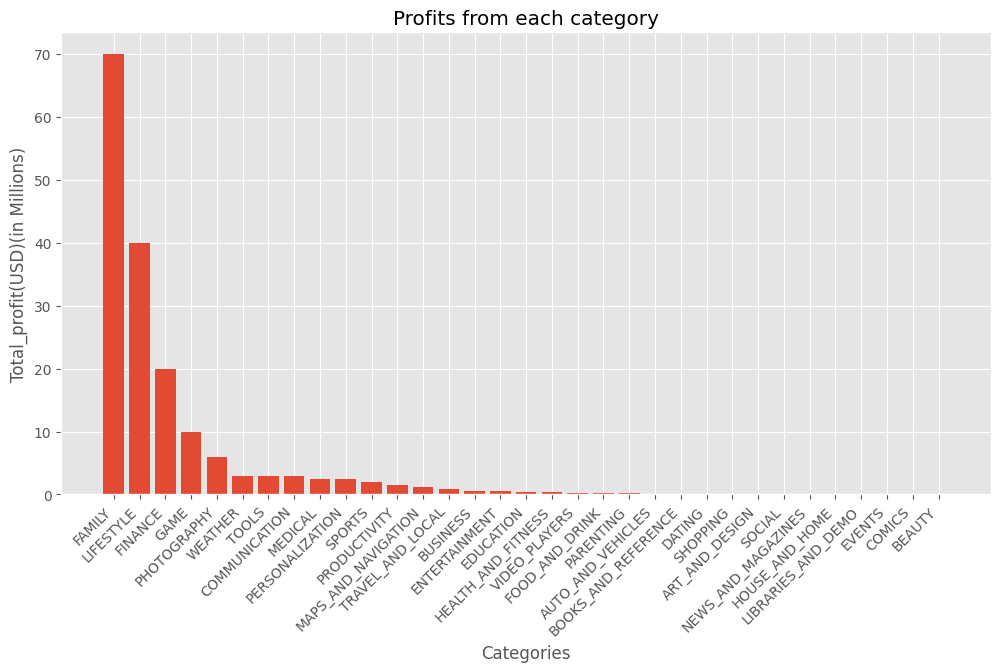

In [12]:
plt.figure(figsize=(12, 6))

# Create a bar chart
plt.bar(df['Category'], df['Total_Profit']/1_000_000)

# Add a title and axis labels
plt.title('Profits from each category')
plt.xlabel('Categories')
plt.ylabel('Total_profit(USD)(in Millions)')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()